In [1]:
# # python version utilised Python 3.10.6

# %pip install plotly==5.14.1 -q
# %pip install jupyter-dash==0.4.2 -q
# %pip install yfinance==0.2.18 -q
# %pip install numpy==1.21.5
# %pip install numpy==1.21.5
# %pip install scipy==1.9.3
# %pip install cvxopt==1.3.0

In [2]:
import pandas
import pandas as pd

import numpy
import numpy as np

from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from datetime import datetime, date

In [3]:
def remove_dot(input: str) -> str:
    if '.' in input:
        return input.split('.')[0]
    else:
        return input

# Download the dataset from Yahoo Finance. If you prefer, you can choose another source.

# Assets

Why i chose nifty 50 stocks

In [4]:
assets = {
    "KOTAKBANK.NS": "Kotak Mahindra Bank Limited",
    "BAJAJFINSV.NS": "Bajaj Finserv Ltd.",
    "TATASTEEL.NS": "Tata Steel Limited",
    "HEROMOTOCO.NS": "Hero MotoCorp Limited",
    "RELIANCE.NS": "Reliance Industries Limited",
    "ICICIBANK.NS": "ICICI Bank Limited",
    "TATACONSUM.NS": "Tata Consumer Products Limited",
    "COALINDIA.NS": "Coal India Limited",
    "TITAN.NS": "Titan Company Limited",
    "ITC.NS": "ITC Limited",
    "MARUTI.NS": "Maruti Suzuki India Limited",
    "TCS.NS": "Tata Consultancy Services Limited",
    "INDUSINDBK.NS": "IndusInd Bank Limited",
    "ULTRACEMCO.NS": "UltraTech Cement Limited",
    "WIPRO.NS": "Wipro Limited",
    "BAJFINANCE.NS": "Bajaj Finance Limited",
    "ADANIENT.NS": "Adani Enterprises Limited",
    "LT.NS": "Larsen & Toubro Limited",
    "ONGC.NS": "Oil and Natural Gas Corporation Limited",
    "APOLLOHOSP.NS": "Apollo Hospitals Enterprise Limited",
    "NESTLEIND.NS": "Nestlé India Limited",
    "HINDALCO.NS": "Hindalco Industries Limited",
    "TECHM.NS": "Tech Mahindra Limited",
    "CIPLA.NS": "Cipla Limited",
    "BRITANNIA.NS": "Britannia Industries Limited",
    "BHARTIARTL.NS": "Bharti Airtel Limited",
    "HDFCLIFE.NS": "HDFC Life Insurance Company Limited",
    "BAJAJ-AUTO.NS": "Bajaj Auto Limited",
    "NTPC.NS": "NTPC Limited"
}

bank_nifty = {
    "AUBANK.NS": "AU Small Finance Bank",
    "AXISBANK.NS": "Axis Bank",
    "BANDHANBNK.NS": "Bandhan Bank",
    "BANKBARODA.NS": "Bank of Baroda Ltd",
    "FEDERALBNK.NS": "Federal Bank",
    "HDFCBANK.NS": "HDFC Bank",
    "ICICIBANK.NS": "ICICI Bank",
    "IDFCFIRSTB.NS": "IDFC First Bank",
    "INDUSINDBK.NS": "IndusInd Bank",
    "KOTAKBANK.NS": "Kotak Mahindra Bank",
    "PNB.NS": "Punjab National Bank",
    "SBIN.NS": "SBI"
}

assets = bank_nifty

assets_list = [key.replace('.NS', '') for key in list(assets.keys())]
print(assets_list)

['AUBANK', 'AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'SBIN']


The yfinance library to download historical stock price data from Yahoo Finance.
1. A Pandas DataFrame named historical_data is created to store the downloaded data.
2. A list of assets tickers is created from a dictionary named assets.
3. The code loops through each ticker in the assets_tickers list and fetches the corresponding stock data using the yf.download() function.
4. The yf.Ticker() function is used to create a Ticker object for each ticker.
5. The downloaded data for each ticker is then assigned to a new column in the historical_data DataFrame using the remove_dot() function to remove any dots in the ticker symbol.
6. The start and end parameters of the yf.download() function are set to "2019-01-01" and "2023-01-01", respectively, to download the data for the specified time period.

Finally, the head() function is used to display the first 10 rows of the historical_data DataFrame.

In [5]:
import yfinance as yf

# Create an empty Pandas DataFrame to store the downloaded data
historical_data = pd.DataFrame()

# Create a list of asset tickers from a dictionary named `assets`
assets_tickers = list(assets.keys())

# Loop through each ticker in the `assets_tickers` list and download the historical data
for tick in assets_tickers:
    # Create a Ticker object for the current ticker
    ticker = yf.Ticker(tick)
    
    # Download the historical data for the current ticker and add it as a new column to the DataFrame
    historical_data[remove_dot(tick)] = yf.download(ticker.ticker, start="2019-01-01", end="2023-01-01")['Adj Close']
    
# Display the first 10 rows of the DataFrame
display(historical_data.head(10))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AUBANK,AXISBANK,BANDHANBNK,BANKBARODA,FEDERALBNK,HDFCBANK,ICICIBANK,IDFCFIRSTB,INDUSINDBK,KOTAKBANK,PNB,SBIN
Date,,,,,,,,,,,,
2019-01-01,310.359650,625.569702,551.757385,119.695847,89.456673,1048.267578,358.771851,43.349998,1566.793579,1248.404419,78.083298,292.297607
2019-01-02,309.511322,618.339661,547.247803,115.861305,91.188087,1038.702759,359.610260,42.700001,1548.136719,1238.570557,76.175240,286.736511
2019-01-03,310.060242,606.273071,529.060730,115.812775,88.494766,1030.553223,358.278717,43.049999,1531.934570,1233.229370,76.175240,284.004791
2019-01-04,311.307770,617.890869,524.204224,118.142609,91.188087,1033.310181,360.202057,45.150002,1520.249390,1245.908569,79.551025,290.395111
2019-01-07,307.565186,635.691711,493.628082,119.113380,90.995705,1034.871826,362.667816,46.150002,1531.001709,1244.560669,78.817162,289.078033
2019-01-08,310.908569,649.104614,472.814545,120.229767,91.620934,1026.258789,374.947388,46.000000,1549.265991,1226.889648,79.942413,297.858643
2019-01-09,314.800842,668.251587,451.356750,119.356071,93.208076,1032.993164,377.018677,46.250000,1572.832642,1236.224365,78.963928,297.858643
2019-01-10,325.230164,661.420532,467.363373,119.841461,92.005707,1028.942749,374.306335,46.950001,1537.630005,1217.554932,79.502098,298.102570
2019-01-11,325.429810,664.661560,450.365631,117.608696,91.765228,1030.601929,373.369324,46.700001,1487.796143,1221.198975,78.915009,295.370819


Log returns are commonly used in finance and investment analysis because they have several desirable properties:

Additivity: Log returns are additive, meaning that the log return of a portfolio is the sum of the log returns of its individual assets. This property is useful for calculating the overall return of a portfolio.

Symmetry: Log returns are symmetric, meaning that the positive and negative returns are equally important. This is important because financial returns can be both positive and negative, and it is desirable to treat them symmetrically.

Normality: Log returns are often assumed to be normally distributed, which allows for the use of statistical techniques that assume normality.

Continuous Compounding: Log returns are closely related to continuous compounding, which is a common assumption in finance. In continuous compounding, the returns are compounded infinitely often over time, which is well approximated by the use of log returns.

For these reasons, log returns are a popular choice for analyzing financial data and are often used in applications such as portfolio optimization, risk management, and performance evaluation.

In [6]:
# calculate historical log returns
hist_return = np.log(historical_data / historical_data.shift())
hist_return = hist_return.dropna()
display(hist_return.head(10))

,AUBANK,AXISBANK,BANDHANBNK,BANKBARODA,FEDERALBNK,HDFCBANK,ICICIBANK,IDFCFIRSTB,INDUSINDBK,KOTAKBANK,PNB,SBIN
Date,,,,,,,,,,,,
2019-01-02,-0.002737,-0.011625,-0.008207,-0.032560,0.019170,-0.009166,0.002334,-0.015108,-0.011979,-0.007908,-0.024740,-0.019209
2019-01-03,0.001772,-0.019707,-0.033798,-0.000419,-0.029981,-0.007877,-0.003710,0.008163,-0.010521,-0.004322,0.000000,-0.009573
2019-01-04,0.004015,0.018981,-0.009222,0.019918,0.029981,0.002672,0.005354,0.047628,-0.007657,0.010229,0.043362,0.022251
2019-01-07,-0.012095,0.028402,-0.060099,0.008183,-0.002112,0.001510,0.006822,0.021907,0.007048,-0.001082,-0.009268,-0.004546
2019-01-08,0.010812,0.020880,-0.043079,0.009329,0.006847,-0.008358,0.033298,-0.003256,0.011859,-0.014300,0.014176,0.029922
2019-01-09,0.012441,0.029071,-0.046445,-0.007293,0.017175,0.006541,0.005509,0.005420,0.015097,0.007580,-0.012315,0.000000
2019-01-10,0.032593,-0.010275,0.034849,0.004058,-0.012984,-0.003929,-0.007220,0.015022,-0.022636,-0.015217,0.006792,0.000819
2019-01-11,0.000614,0.004888,-0.037047,-0.018807,-0.002617,0.001611,-0.002506,-0.005339,-0.032946,0.002988,-0.007412,-0.009206
2019-01-14,0.004590,-0.011013,-0.024957,-0.001652,-0.051624,-0.004865,-0.013832,0.004274,-0.020740,-0.009405,0.022679,-0.007792


In [7]:
# find historical mean, covriance, and correlation
hist_mean = hist_return.mean(axis=0).to_frame()
hist_mean.columns = ['mu']
hist_cov = hist_return.cov()
hist_corr = hist_return.corr()
display(hist_mean.transpose())
display(hist_cov)
display(hist_corr)

,AUBANK,AXISBANK,BANDHANBNK,BANKBARODA,FEDERALBNK,HDFCBANK,ICICIBANK,IDFCFIRSTB,INDUSINDBK,KOTAKBANK,PNB,SBIN
mu,0.000754,0.000405,-0.000866,0.000444,0.000446,0.000445,0.00092,0.000308,-0.000253,0.000385,-0.000328,0.00075


,AUBANK,AXISBANK,BANDHANBNK,BANKBARODA,FEDERALBNK,HDFCBANK,ICICIBANK,IDFCFIRSTB,INDUSINDBK,KOTAKBANK,PNB,SBIN
AUBANK,0.000770,0.000261,0.000407,0.000278,0.000330,0.000191,0.000247,0.000299,0.000371,0.000188,0.000248,0.000258
AXISBANK,0.000261,0.000663,0.000436,0.000377,0.000461,0.000263,0.000442,0.000387,0.000535,0.000274,0.000312,0.000389
BANDHANBNK,0.000407,0.000436,0.001166,0.000385,0.000525,0.000246,0.000385,0.000452,0.000674,0.000281,0.000331,0.000354
BANKBARODA,0.000278,0.000377,0.000385,0.000810,0.000470,0.000205,0.000336,0.000459,0.000418,0.000203,0.000579,0.000481
FEDERALBNK,0.000330,0.000461,0.000525,0.000470,0.000703,0.000256,0.000401,0.000476,0.000574,0.000260,0.000399,0.000414
HDFCBANK,0.000191,0.000263,0.000246,0.000205,0.000256,0.000330,0.000274,0.000226,0.000309,0.000244,0.000164,0.000232
ICICIBANK,0.000247,0.000442,0.000385,0.000336,0.000401,0.000274,0.000517,0.000334,0.000459,0.000269,0.000288,0.000367
IDFCFIRSTB,0.000299,0.000387,0.000452,0.000459,0.000476,0.000226,0.000334,0.000787,0.000509,0.000231,0.000429,0.000380
INDUSINDBK,0.000371,0.000535,0.000674,0.000418,0.000574,0.000309,0.000459,0.000509,0.001196,0.000308,0.000371,0.000421
KOTAKBANK,0.000188,0.000274,0.000281,0.000203,0.000260,0.000244,0.000269,0.000231,0.000308,0.000394,0.000169,0.000222


,AUBANK,AXISBANK,BANDHANBNK,BANKBARODA,FEDERALBNK,HDFCBANK,ICICIBANK,IDFCFIRSTB,INDUSINDBK,KOTAKBANK,PNB,SBIN
AUBANK,1.000000,0.364790,0.429660,0.351911,0.449277,0.378368,0.391723,0.384555,0.386932,0.342206,0.327406,0.403553
AXISBANK,0.364790,1.000000,0.495503,0.514375,0.675912,0.562476,0.754770,0.536461,0.601173,0.535641,0.444734,0.654617
BANDHANBNK,0.429660,0.495503,1.000000,0.395969,0.579785,0.397279,0.496161,0.471607,0.570389,0.414311,0.355121,0.448845
BANKBARODA,0.351911,0.514375,0.395969,1.000000,0.622747,0.397230,0.519965,0.575445,0.424465,0.360089,0.746474,0.732628
FEDERALBNK,0.449277,0.675912,0.579785,0.622747,1.000000,0.531420,0.664760,0.639799,0.626470,0.494280,0.551956,0.676471
HDFCBANK,0.378368,0.562476,0.397279,0.397230,0.531420,1.000000,0.664671,0.443412,0.491376,0.676268,0.331311,0.553611
ICICIBANK,0.391723,0.754770,0.496161,0.519965,0.664760,0.664671,1.000000,0.523869,0.583480,0.596558,0.465074,0.699266
IDFCFIRSTB,0.384555,0.536461,0.471607,0.575445,0.639799,0.443412,0.523869,1.000000,0.524957,0.414728,0.560583,0.586890
INDUSINDBK,0.386932,0.601173,0.570389,0.424465,0.626470,0.491376,0.583480,0.524957,1.000000,0.449298,0.393301,0.528055
KOTAKBANK,0.342206,0.535641,0.414311,0.360089,0.494280,0.676268,0.596558,0.414728,0.449298,1.000000,0.312585,0.484152


In [8]:
# construct random portfolios
n_portfolios = 50000
#set up array to hold results
port_returns = np.zeros(n_portfolios)
port_stdevs = np.zeros(n_portfolios)


In [9]:
for i in range(n_portfolios):
    w = np.random.rand(len(assets))        # random weights
    w = w / sum(w)                         # weights sum to 1
    port_return = np.dot(w.T, hist_mean.values) * 250         # annualize; 250 business days
    port_stdev = np.sqrt(np.dot(w.T, np.dot(hist_cov, w))) * np.sqrt(250)  # annualize; 250 business days
    port_returns[i] = port_return
    port_stdevs[i] = port_stdev

# Plotting Return and Standard Deviation of Randomly Generated Portfolios

In [10]:
import plotly.graph_objects as go

# create scatter plot
fig = go.Figure(data=go.Scatter(x=port_stdevs, y=port_returns, mode='markers', marker=dict(symbol='circle', size=6)))

# add axis labels and title
fig.update_layout(xaxis_title='Expected Volatility', yaxis_title='Expected Return', title='Return and Standard Deviation of Randomly Generated Portfolios')

# show plot
fig.show()


In [11]:
# Global Minimum Variance (GMV) -- closed form
hist_cov_inv = - np.linalg.inv(hist_cov)
one_vec = np.ones(len(assets))
w_gmv = np.dot(hist_cov_inv, one_vec) / (np.dot(np.transpose(one_vec), np.dot(hist_cov_inv, one_vec)))
w_gmv_df = pd.DataFrame(data = w_gmv).transpose()
w_gmv_df.columns = assets
stdev_gmv = np.sqrt(np.dot(w_gmv.T, np.dot(hist_cov, w_gmv))) * np.sqrt(250)
display(w_gmv_df)
display(stdev_gmv)

,AUBANK.NS,AXISBANK.NS,BANDHANBNK.NS,BANKBARODA.NS,FEDERALBNK.NS,HDFCBANK.NS,ICICIBANK.NS,IDFCFIRSTB.NS,INDUSINDBK.NS,KOTAKBANK.NS,PNB.NS,SBIN.NS
0,0.126835,0.020272,0.004486,-0.026739,-0.046758,0.477153,-0.010482,0.028309,-0.079397,0.271722,0.162745,0.071853


0.2545981486340324

In [12]:
# Global Minimum Variance (GMV) -- numerical
P = matrix(hist_cov.values)
q = matrix(np.zeros((len(assets), 1)))
A = matrix(1.0, (1, len(assets)))
b = matrix(1.0)
w_gmv_v2 = np.array(solvers.qp(P, q, A=A, b=b)['x'])
w_gmv_df_v2 = pd.DataFrame(w_gmv_v2).transpose()
w_gmv_df_v2.columns = assets
stdev_gmv_v2 = np.sqrt(np.dot(w_gmv_v2.T, np.dot(hist_cov, w_gmv_v2))) * np.sqrt(250)
display(w_gmv_df_v2)
display(stdev_gmv_v2.item())

,AUBANK.NS,AXISBANK.NS,BANDHANBNK.NS,BANKBARODA.NS,FEDERALBNK.NS,HDFCBANK.NS,ICICIBANK.NS,IDFCFIRSTB.NS,INDUSINDBK.NS,KOTAKBANK.NS,PNB.NS,SBIN.NS
0,0.126835,0.020272,0.004486,-0.026739,-0.046758,0.477153,-0.010482,0.028309,-0.079397,0.271722,0.162745,0.071853


0.2545981486340323

In [13]:
# Maximum return -- closed form
mu_o = hist_mean.max(axis=0).item()   # MCD
A = np.matrix([[
    np.dot(hist_mean.T,np.dot(hist_cov_inv,hist_mean)).item(),
                np.dot(hist_mean.T,np.dot(hist_cov_inv,one_vec)).item()],
               [np.dot(hist_mean.T,np.dot(hist_cov_inv,one_vec)).item(),
                np.dot(one_vec.T,np.dot(hist_cov_inv,one_vec)).item()]])
B = np.hstack([np.array(hist_mean),one_vec.reshape(len(assets),1)])
y = np.matrix([mu_o, 1]).T
w_max_ret = np.dot(np.dot(np.dot(hist_cov_inv, B),  np.linalg.inv(A)),y)
w_max_ret_df = pd.DataFrame(w_max_ret).T
w_max_ret_df.columns = assets
display(w_max_ret_df)

,AUBANK.NS,AXISBANK.NS,BANDHANBNK.NS,BANKBARODA.NS,FEDERALBNK.NS,HDFCBANK.NS,ICICIBANK.NS,IDFCFIRSTB.NS,INDUSINDBK.NS,KOTAKBANK.NS,PNB.NS,SBIN.NS
0,0.19885,-0.04801,-0.122016,0.030999,0.001857,0.395783,0.207041,0.054357,-0.131725,0.253427,-0.032348,0.191786


In [14]:
# Maximum return -- numerical
P = matrix(hist_cov.values)
q = matrix(np.zeros((len(assets), 1)))
A = matrix(np.hstack([np.array(hist_mean),one_vec.reshape(len(assets),1)]).transpose())
b = matrix([mu_o,1])
w_max_ret_v2 = np.array(solvers.qp(P, q, A=A, b=b)['x'])
w_max_ret_df_v2 = pd.DataFrame(w_max_ret_v2).transpose()
w_max_ret_df_v2.columns = assets
display(w_max_ret_df_v2)

,AUBANK.NS,AXISBANK.NS,BANDHANBNK.NS,BANKBARODA.NS,FEDERALBNK.NS,HDFCBANK.NS,ICICIBANK.NS,IDFCFIRSTB.NS,INDUSINDBK.NS,KOTAKBANK.NS,PNB.NS,SBIN.NS
0,0.19885,-0.04801,-0.122016,0.030999,0.001857,0.395783,0.207041,0.054357,-0.131725,0.253427,-0.032348,0.191786


In [15]:
# efficient frontier
N = 100
ef_left = (min(hist_mean.values)).item()          # minimum return
ef_right = (max(hist_mean.values)).item()          # maximum return
target_returns = np.linspace(ef_left, ef_right, N)         # N target returns
optimal_weights = [ solvers.qp(P, q, A=A, b=matrix([t,1]))['x'] for t in target_returns ]    # QP solver
ef_returns = [ (np.dot(w.T, hist_mean.values)*250).item() for w in optimal_weights ]         # annualized
ef_risks = [ (np.sqrt(np.dot(w.T, np.dot(hist_cov, w)) * 250)).item() for w in optimal_weights ]

print(optimal_weights) 

[<12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matrix, tc='d'>, <12x1 matr

/tmp/ipykernel_839537/829571744.py:4: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "y-o" (-> color='y'). The keyword argument will take precedence.



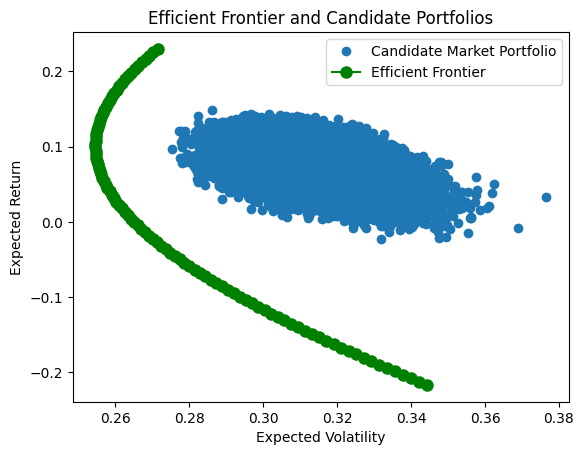

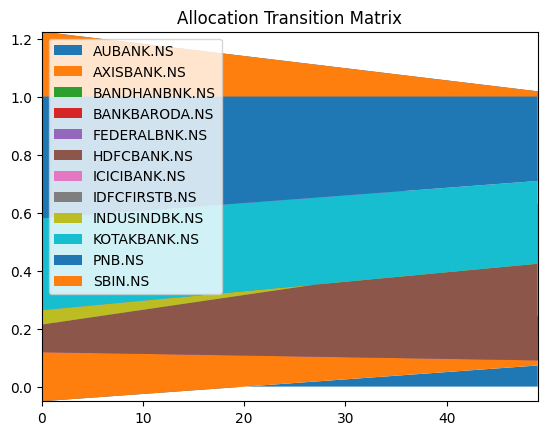

In [16]:
import matplotlib.pyplot as plt

plt.plot(port_stdevs, port_returns, 'o', markersize=6, label='Candidate Market Portfolio')
plt.plot(ef_risks, ef_returns, 'y-o', color='green', markersize=8, label='Efficient Frontier')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Candidate Portfolios')
plt.legend(loc='best')
plt.show()

transition_data = pd.DataFrame(optimal_weights)
transition_data.columns = assets
plt.stackplot(range(50), transition_data.iloc[:50,:].T, labels=assets)             # the other half has negative weights
plt.legend(loc='upper left')
plt.margins(0, 0)
plt.title('Allocation Transition Matrix')
plt.show()


In [17]:
# Maximum sharpe -- closed form
r_f = 0.01
w_sharpe = np.dot(hist_cov_inv, hist_mean.values-r_f/250) / np.dot(one_vec, np.dot(hist_cov_inv, hist_mean.values-r_f/250))
w_sharpe_df = pd.DataFrame(w_sharpe).T
w_sharpe_df.columns = assets_list
display(w_sharpe_df)
display(mu_sharpe := np.dot(w_sharpe.T, hist_mean.values) * 250)
display(stdev_sharpe := np.sqrt(np.dot(w_sharpe.T, np.dot(hist_cov, w_sharpe))) * np.sqrt(250))
display(sharpe_ratio := (mu_sharpe-r_f)/stdev_sharpe)

,AUBANK,AXISBANK,BANDHANBNK,BANKBARODA,FEDERALBNK,HDFCBANK,ICICIBANK,IDFCFIRSTB,INDUSINDBK,KOTAKBANK,PNB,SBIN
0,0.873934,-0.688093,-1.307866,0.572239,0.457585,-0.366991,2.246114,0.298533,-0.622254,0.081925,-1.861173,1.316046


array([[1.43815014]])

array([[1.00855678]])

array([[1.41603346]])

In [18]:
from scipy.optimize import minimize

fun = lambda w: -1 * np.dot(w.T, hist_mean.values*250-r_f) / np.sqrt(np.dot(w.T, np.dot(hist_cov*250, w)))
cons = ({'type': 'eq', 'fun': lambda w:  np.dot(w.T, one_vec)-1})
res = minimize(fun, w_gmv, method='SLSQP', constraints=cons)
w_sharpe_v2 = res['x']
w_sharpe_v2_df = pd.DataFrame(w_sharpe_v2).T
w_sharpe_v2_df.columns = assets_list
display(w_sharpe_v2_df)
display(mu_sharpe_v2 := np.dot(w_sharpe_v2.T, hist_mean.values) * 250)
display(stdev_sharpe_v2 := np.sqrt(np.dot(w_sharpe_v2.T, np.dot(hist_cov, w_sharpe_v2))) * np.sqrt(250))
display(sharpe_ratio_v2 := (mu_sharpe-r_f)/stdev_sharpe)

,AUBANK,AXISBANK,BANDHANBNK,BANKBARODA,FEDERALBNK,HDFCBANK,ICICIBANK,IDFCFIRSTB,INDUSINDBK,KOTAKBANK,PNB,SBIN
0,0.87179,-0.685046,-1.30589,0.575393,0.457506,-0.367775,2.238046,0.297056,-0.620102,0.086541,-1.857911,1.310393


array([1.43489268])

1.0062580208857899

array([[1.41603346]])